In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import io

In [4]:
business_df = pd.read_json(r"C:\Users\42142\Downloads\yelp_dataset\business.json",orient='records', lines=True)

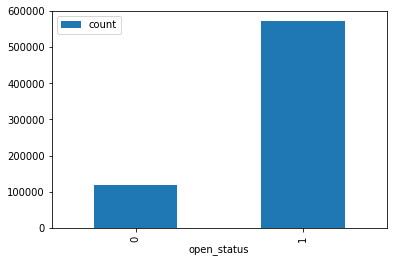

In [14]:
#Checking the attribute of the restaurant if its open or not and eliminating the restaurant which is closed.
business_grouped_by_status = business_df[['is_open','stars']].groupby(by='is_open').sum().reset_index()
business_grouped_by_status.columns = ['open_status', 'count']
business_grouped_by_status.plot(kind='bar', x='open_status', y='count')
plt.show()

In [15]:
# eliminate restaurants that are closed
business_df = business_df[business_df['is_open'] == 1]

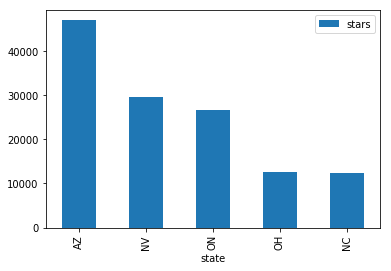

In [16]:
most_business_info = business_df[['state', 'stars']].groupby(by='state').count().reset_index().sort_values(by='stars', ascending=False).head(5)
most_business_info.plot(kind='bar', x='state', y='stars')
plt.show()

In [ ]:
review_json_file = r"C:\Users\42142\Downloads\yelp_dataset\review.json"
review = []
for line in open(review_json_file, 'r',encoding="utf8"):
    review.append(json.loads(line))

In [5]:
review_df = pd.DataFrame.from_records(review)

KeyboardInterrupt: 

In [ ]:
review_count_dict = dict(reviews_df['stars'].value_counts())
star_counts = sorted(review_count_dict.items(), key=lambda x:x[0])

fig, ax = plt.subplots()

plt.bar(*zip(*star_counts), edgecolor='black', linewidth=1.2)

ax.set_title("Review Count per Star")
ax.set_xlabel("Star Rating")
ax.set_ylabel("No of Reviews")
fig.tight_layout()


In [ ]:
fig, ax = plt.subplots()

bins = np.arange(10,210,10)
ax.hist(users_df['review_count'], bins=bins, edgecolor='black', linewidth=1.2)

ax.set_title("User distribution by Review Count (10-200)")
ax.set_xlabel("Review Count")
ax.set_ylabel("No of Users")

x_ticks = ax.get_xticks()
x_ticks[-1] = 10
ax.set_xticks(x_ticks)

fig.tight_layout()

In [ ]:
###不一定要用 抄的
from wordcloud import WordCloud
from nltk.corpus import stopwords
one_star_reviews = reviews_df.loc[reviews_df['stars'].isin([1,1.5])]
one_star_reviews = one_star_reviews.reset_index(drop=True)
five_star_reviews = reviews_df.loc[reviews_df['stars'].isin([4.5,5])]
five_star_reviews = five_star_reviews.reset_index(drop=True)

In [ ]:
cloud1 = WordCloud(width = 1000, height = 500, background_color="white", max_words=40, max_font_size=120,
                  stopwords=stopwords.words('english'), random_state=1, margin=10)

five_star_cloud1 = cloud1.generate(five_star_reviews.loc[:500000,'text'].str.cat(sep='\n'))

cloud2 = WordCloud(width = 1000, height = 500, background_color="white", max_words=40, max_font_size=120,
                  stopwords=stopwords.words('english'), random_state=1, margin=10)
five_star_cloud2 = cloud2.generate(five_star_reviews.loc[500000:1000000,'text'].str.cat(sep='\n'))

In [ ]:
cloud3 = WordCloud(width = 1000, height = 500, background_color="white", max_words=40, max_font_size=120,
                  random_state=1, margin=10)

five_star_cloud3 = cloud3.generate(five_star_reviews.loc[1000000:1500000,'text'].str.cat(sep='\n'))

cloud4 = WordCloud(width = 1000, height = 500, background_color="white", max_words=40, max_font_size=120,
                  random_state=1, margin=10)
five_star_cloud4 = cloud4.generate(five_star_reviews.loc[1500000:,'text'].str.cat(sep='\n'))

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 6))

#plt.title("5-Star Reviews", fontsize=20)
ax[0][0].imshow(five_star_cloud1, interpolation="bilinear")
ax[0][1].imshow(five_star_cloud2, interpolation="bilinear")
ax[1][0].imshow(five_star_cloud3, interpolation="bilinear")
ax[1][1].imshow(five_star_cloud4, interpolation="bilinear")

ax[0][0].axis("off")
ax[0][1].axis("off")
ax[1][0].axis("off")
ax[1][1].axis("off")

plt.subplots_adjust(wspace=0, hspace=0) #change the spacing between the subplots
plt.suptitle("5-Star Reviews", y=1.03, fontsize=20)   # Supertitle
# control the extra padding around the figure border and between subplots.
fig.tight_layout(pad=0.4, w_pad=0.5,h_pad=0.4)
    
plt.show()
